In [1]:
!pip install -q transformers==4.37.2
!pip install bitsandbytes==0.41.3
!pip install accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusol

In [2]:
import torch
from transformers import BitsAndBytesConfig
from transformers import pipeline

In [3]:
quant_config=BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [4]:
model_id="llava-hf/llava-1.5-7b-hf"

In [ ]:
pipe=pipeline(
    "image-to-text",
    model=model_id,
    model_kwargs={"quantization_config":quant_config},


)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

In [8]:
pipe

In [7]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

In [9]:
image_path="/content/testimage.jpg"

In [10]:
image=Image.open((image_path))

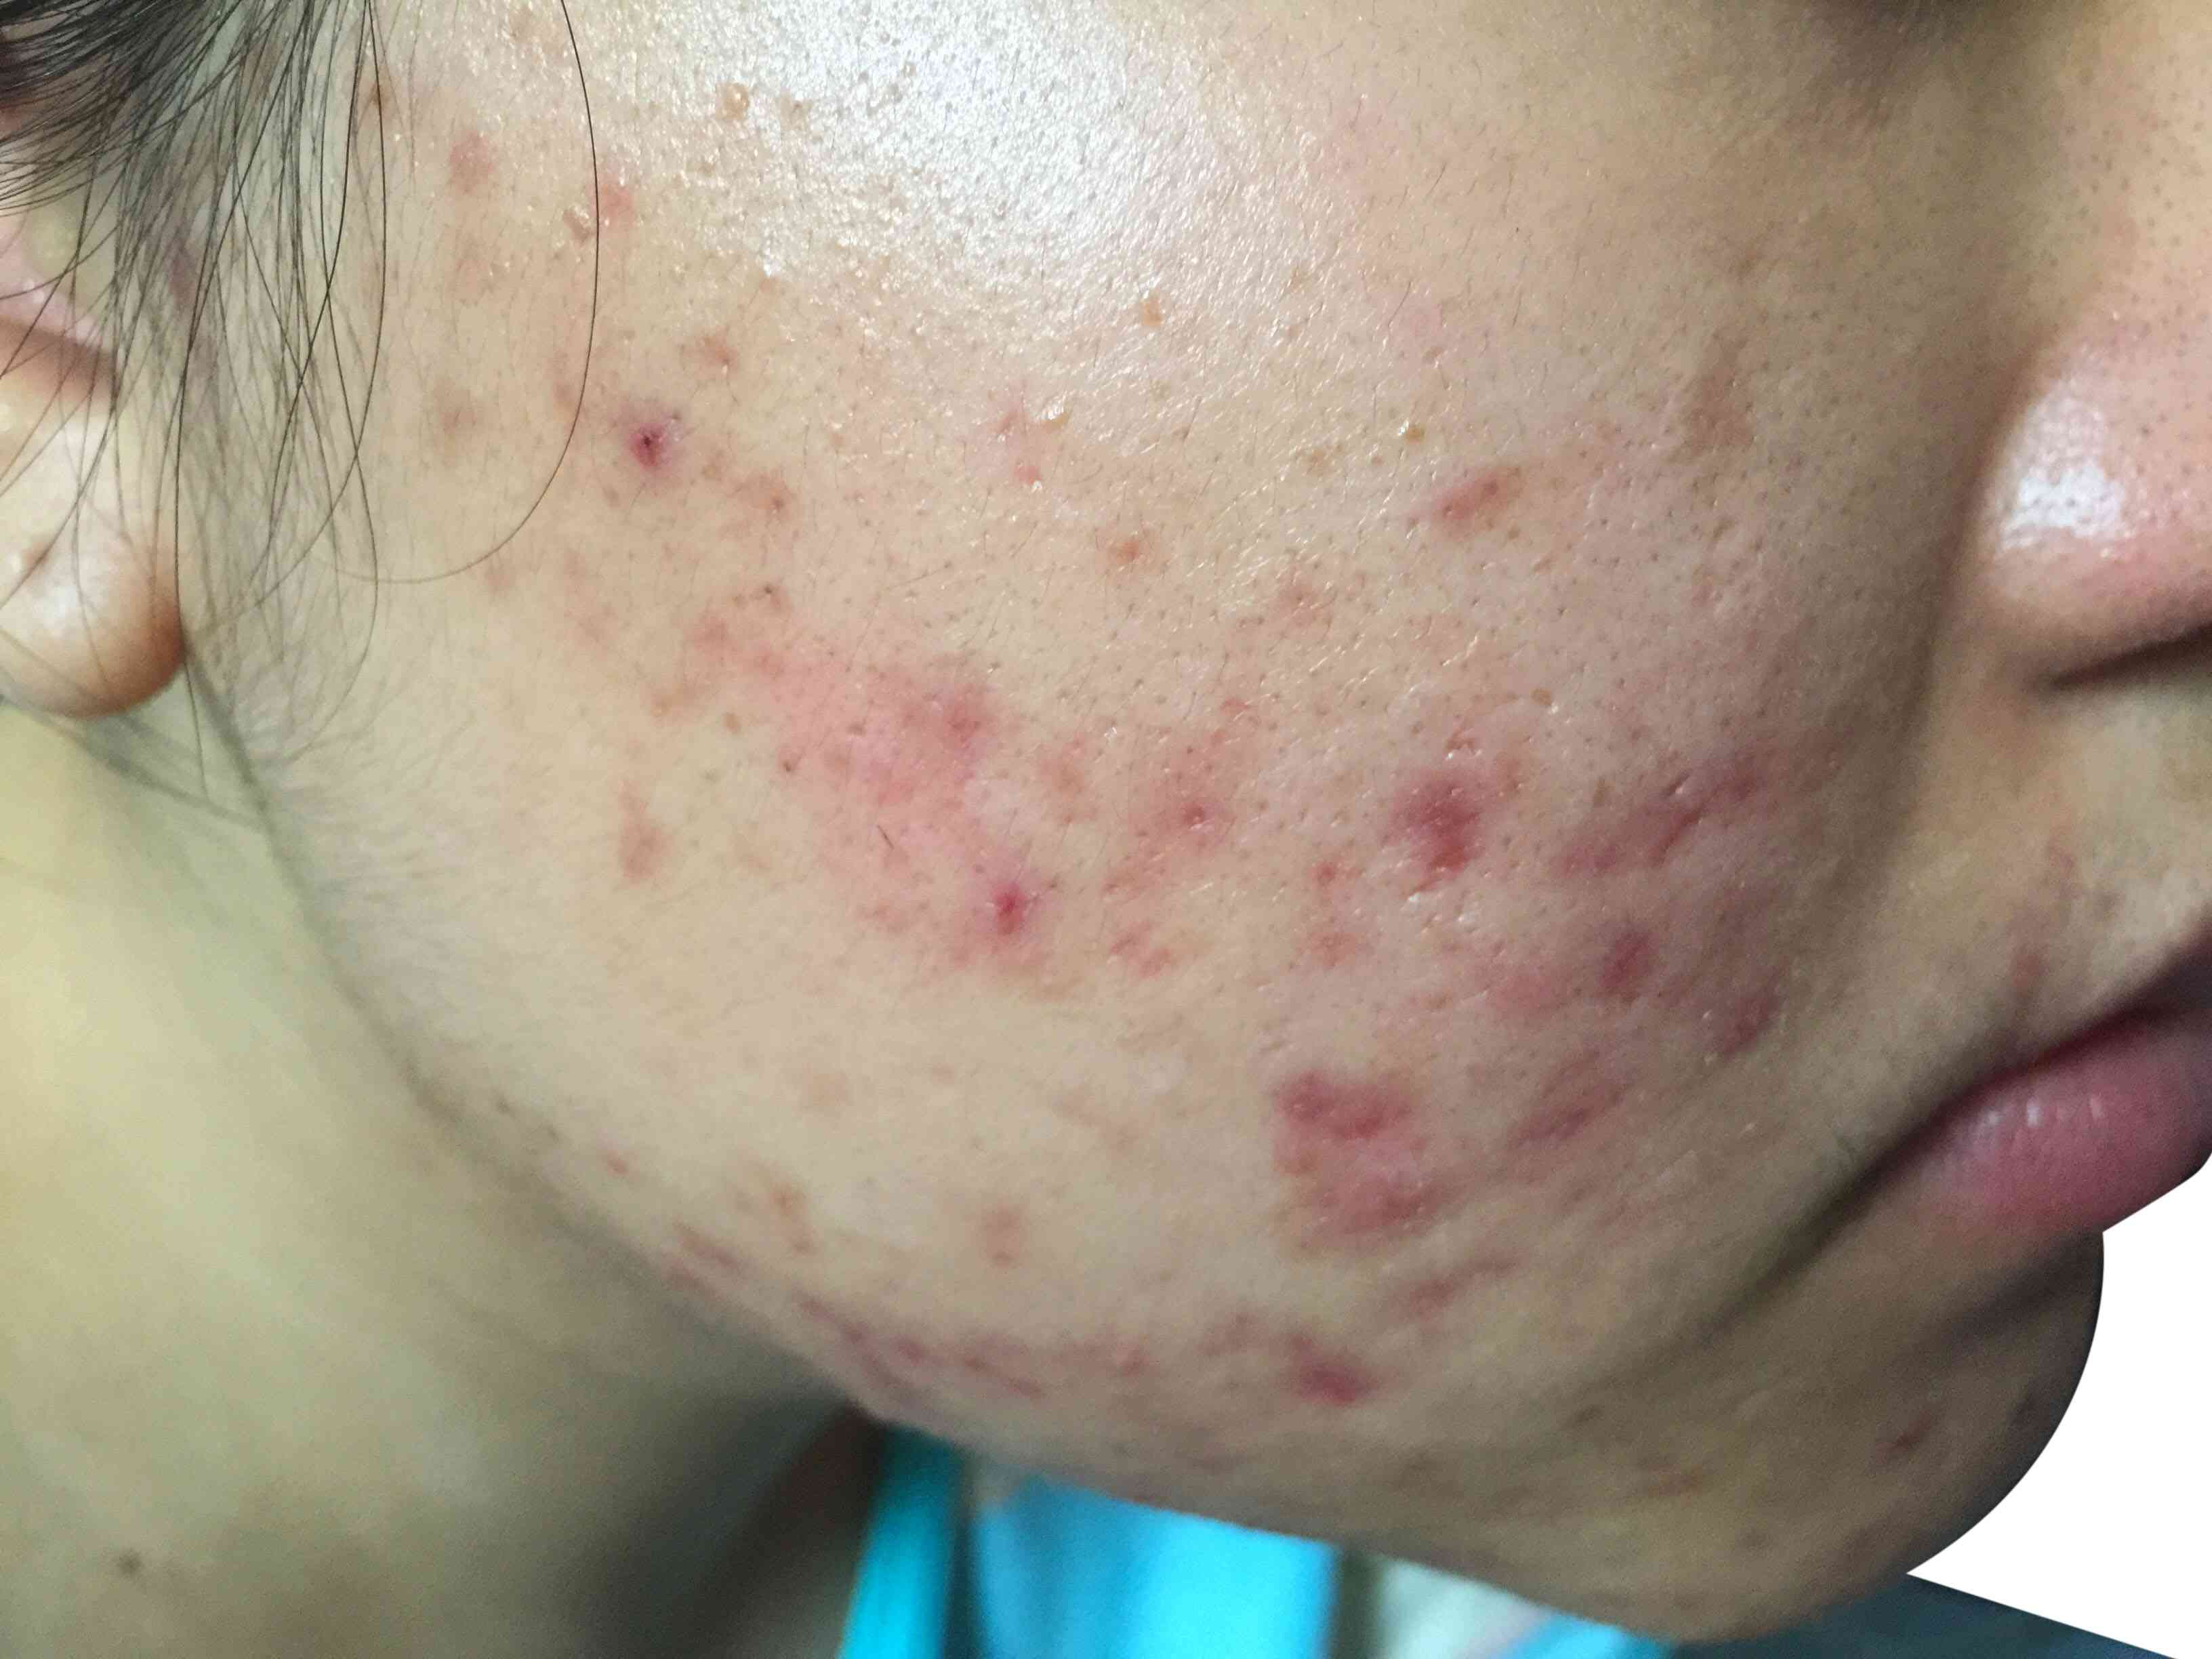

In [11]:
image

In [12]:
import nltk
from nltk import sent_tokenize

In [13]:
max_new_tokens=250

In [14]:
prompt_instructions="""
Describe the image using as much as possible detail.
You are a helpful AI assistant who is able to answer questions about images
What is the image all about?
Now generate the helpful answer
"""

In [15]:
prompt="User:<image>\n"+prompt_instructions+"\nAssistant:"

In [17]:
outputs=pipe(image,prompt=prompt,generate_kwargs={"max_new_tokens":max_new_tokens})

In [18]:
outputs

[{'generated_text': "User: \n\nDescribe the image using as much as possible detail.\nYou are a helpful AI assistant who is able to answer questions about images\nWhat is the image all about?\nNow generate the helpful answer\n\nAssistant: The image features a close-up of a person's face, focusing on their forehead and cheek area. The person appears to have a skin condition, possibly acne or a rash, which is visible on their face. The skin condition is quite noticeable, and it seems to be affecting the person's self-confidence. The image captures the person's emotional state and the challenges they face due to their skin condition."}]

In [20]:
nltk.download('punkt')
for sent in sent_tokenize(outputs[0]["generated_text"]):
  print(sent)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


User: 

Describe the image using as much as possible detail.
You are a helpful AI assistant who is able to answer questions about images
What is the image all about?
Now generate the helpful answer

Assistant: The image features a close-up of a person's face, focusing on their forehead and cheek area.
The person appears to have a skin condition, possibly acne or a rash, which is visible on their face.
The skin condition is quite noticeable, and it seems to be affecting the person's self-confidence.
The image captures the person's emotional state and the challenges they face due to their skin condition.


In [22]:
warnings.filterwarnings("ignore")

In [23]:
import numpy as np

In [27]:
torch.cuda.is_available()

True

In [25]:
torch_device="cuda:0" if torch.cuda.is_available() else "cpu"

In [28]:
print(f"Using torch {torch.__version__} ({torch_device})")

Using torch 2.3.1+cu121 (cuda:0)


In [29]:
import whisper

In [31]:
model=whisper.load_model("medium",device=torch_device)

In [32]:
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

Model is multilingual and has 762,321,920 parameters.


In [34]:
import re
import datetime

In [35]:
##Logger file
tstamp=datetime.datetime.now()
tstamp=str(tstamp).replace(" ","_")
logfile=f"log_{tstamp}.txt"

In [36]:
def writehistory(text):
  with open(logfile,"a",encoding='utf-8') as f:
    f.write(text)
    f.write(text+"\n")
    f.close()

In [38]:
import requests
from PIL import Image

In [50]:
def img2txt(input_text,input_image):
  image=Image.open(input_image)

  writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
  if type(input_text) == tuple:
        prompt_instructions = """
      Describe the image using as much as possible detail.
      You are a helpful AI assistant who is able to answer questions about images
      What is the image all about?
      Now generate the helpful answer
      """
  else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

  writehistory(f"prompt_instructions: {prompt_instructions}")
  prompt = "USER: <image>/n" + prompt_instructions + "\nASSISTANT:"
  ouputs=pipe(image,prompt=prompt,generate_kwargs={"max_new_tokens":200})

  if outputs is not None and len(outputs[0]["generated_text"]) > 0:
   match=re.search(r"ASSISTANT:(.*)",outputs[0]["generated_text"])
   if match:
     reply=match.group(1)
   else:
     reply="No response found."
  else:
    reply="No response found."
  return reply


In [40]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [41]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [46]:
import locale
locale.getpreferredencoding=lambda: "UTF-8"

In [47]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [51]:
import gradio as gr
import base64
import os


def process_inputs(audio_path, image_path):

    speech_to_text_output = transcribe(audio_path)


    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."


    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")

    return speech_to_text_output, chatgpt_output, processed_audio_path

iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="AI Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Voice Assistant:",
    description="Upload an image and interact via voice input and audio response."
)

In [1]:
iface.launch(debug=True)

NameError: name 'iface' is not defined